# **Regression Algorithm**

Regression algorithms are a set of machine learning techniques used for predicting a continuous output or dependent variable based on one or more independent variables. These algorithms are widely used in various fields such as finance, economics, healthcare, and marketing to model relationships and make predictions. Here are some commonly used regression algorithms:

### **1. Linear Regression**
**Description**:
Linear regression is the simplest and most commonly used regression algorithm. It models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.

### **2. Decision Tree Regression**
**Description**:
Decision tree regression models the target variable by learning simple decision rules inferred from the data features. It splits the data into subsets based on the feature that results in the largest information gain.

### **3. Random Forest Regression**
**Description**:
Random forest regression is an ensemble method that combines multiple decision trees to improve the predictive performance and control overfitting.

### **4. Support Vector Regression (SVR)**
**Description**:
Support vector regression uses the principles of support vector machines (SVM) for regression tasks. It tries to fit the best line within a threshold value.

### **5. K-Nearest Neighbors Regression (KNN)**
**Description**:
KNN regression predicts the target by averaging the values of the k-nearest neighbors in the feature space.

### **6. Gradient Boosting Regression**
**Description**:
Gradient boosting regression builds an ensemble of weak prediction models (typically decision trees) in a sequential manner, where each model corrects the errors of the previous one.



## **Ecommerce Dataset**

This dataset is having data of customers who buys clothes online. The store offers in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.
The company is trying to decide whether to focus their efforts on their mobile app experience or their website.

### **Features in E-Commerce Datasets**

1. **Avg. Session Length**: The average duration of a session on the website.
2. **Time on App**: The average time a user spends on the mobile app.
3. **Time on Website**: The average time a user spends on the website.
4. **Length of Membership**: The duration of the user's membership.
5. **Yearly Amount Spent**: The total amount spent by the user in a year.



In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import joblib
from sklearn.linear_model import LinearRegression

In [13]:
#from google.colab import drive
#drive.mount('/content/drive')

In [15]:
#file_path = '/content/drive/My Drive/Ecommerce_Dataset/Ecommerce_Customers'

In [17]:
ecommerce_data = pd.read_csv("Ecommerce_Customers.csv")


In [19]:
ecommerce_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [21]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [23]:
# Summary statistics
summary_stats = ecommerce_data.describe()
print("Summary Statistics:\n")
summary_stats


Summary Statistics:



,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [25]:
ecommerce_data_n = ecommerce_data.select_dtypes(exclude=['object','category'])

# Correlation matrix
corr_matrix = ecommerce_data_n.corr()
print("\nCorrelation Matrix:\n")
corr_matrix


Correlation Matrix:



,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


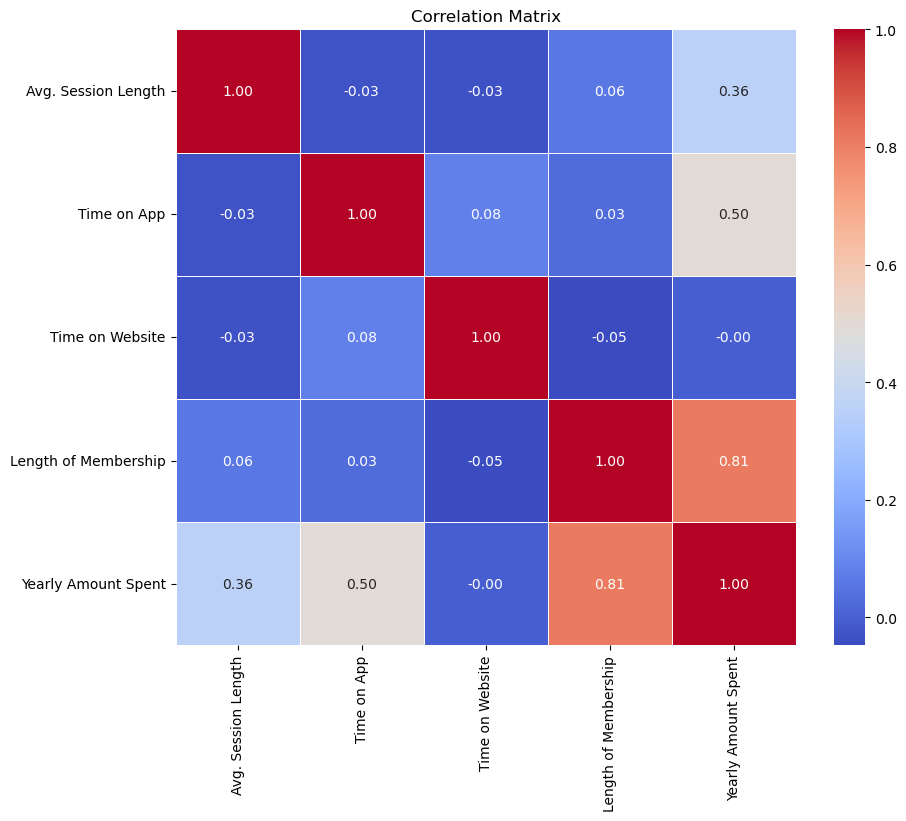

In [27]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

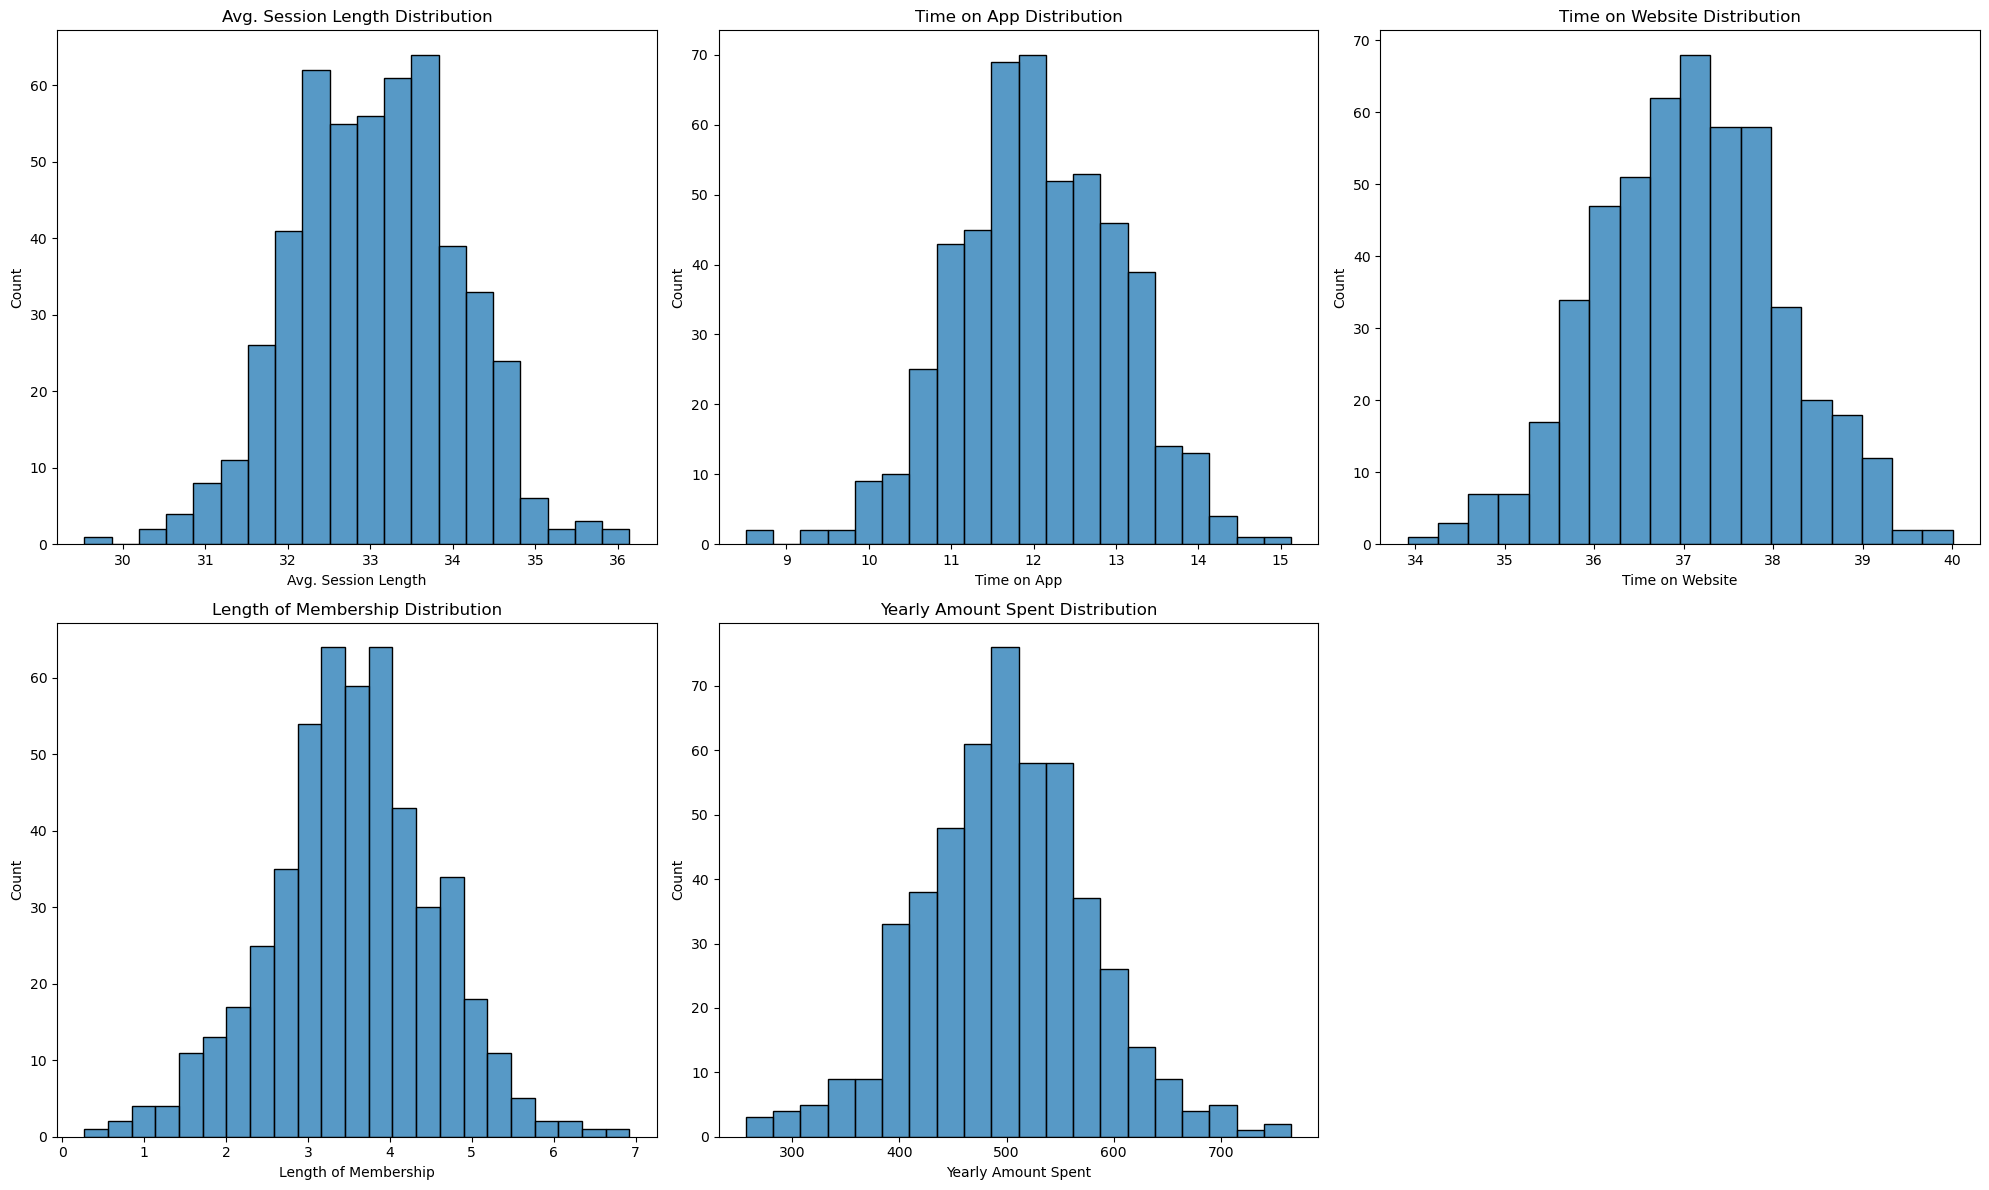

In [29]:
# Set up the matplotlib figure for histograms
plt.figure(figsize=(20, 12))

# Histograms of Numerical Features
plt.subplot(2, 3, 1)
sns.histplot(ecommerce_data['Avg. Session Length'], kde=False)
plt.title('Avg. Session Length Distribution')

plt.subplot(2, 3, 2)
sns.histplot(ecommerce_data['Time on App'], kde=False)
plt.title('Time on App Distribution')

plt.subplot(2, 3, 3)
sns.histplot(ecommerce_data['Time on Website'], kde=False)
plt.title('Time on Website Distribution')

plt.subplot(2, 3, 4)
sns.histplot(ecommerce_data['Length of Membership'], kde=False)
plt.title('Length of Membership Distribution')

plt.subplot(2, 3, 5)
sns.histplot(ecommerce_data['Yearly Amount Spent'], kde=False)
plt.title('Yearly Amount Spent Distribution')

plt.tight_layout()
plt.show()

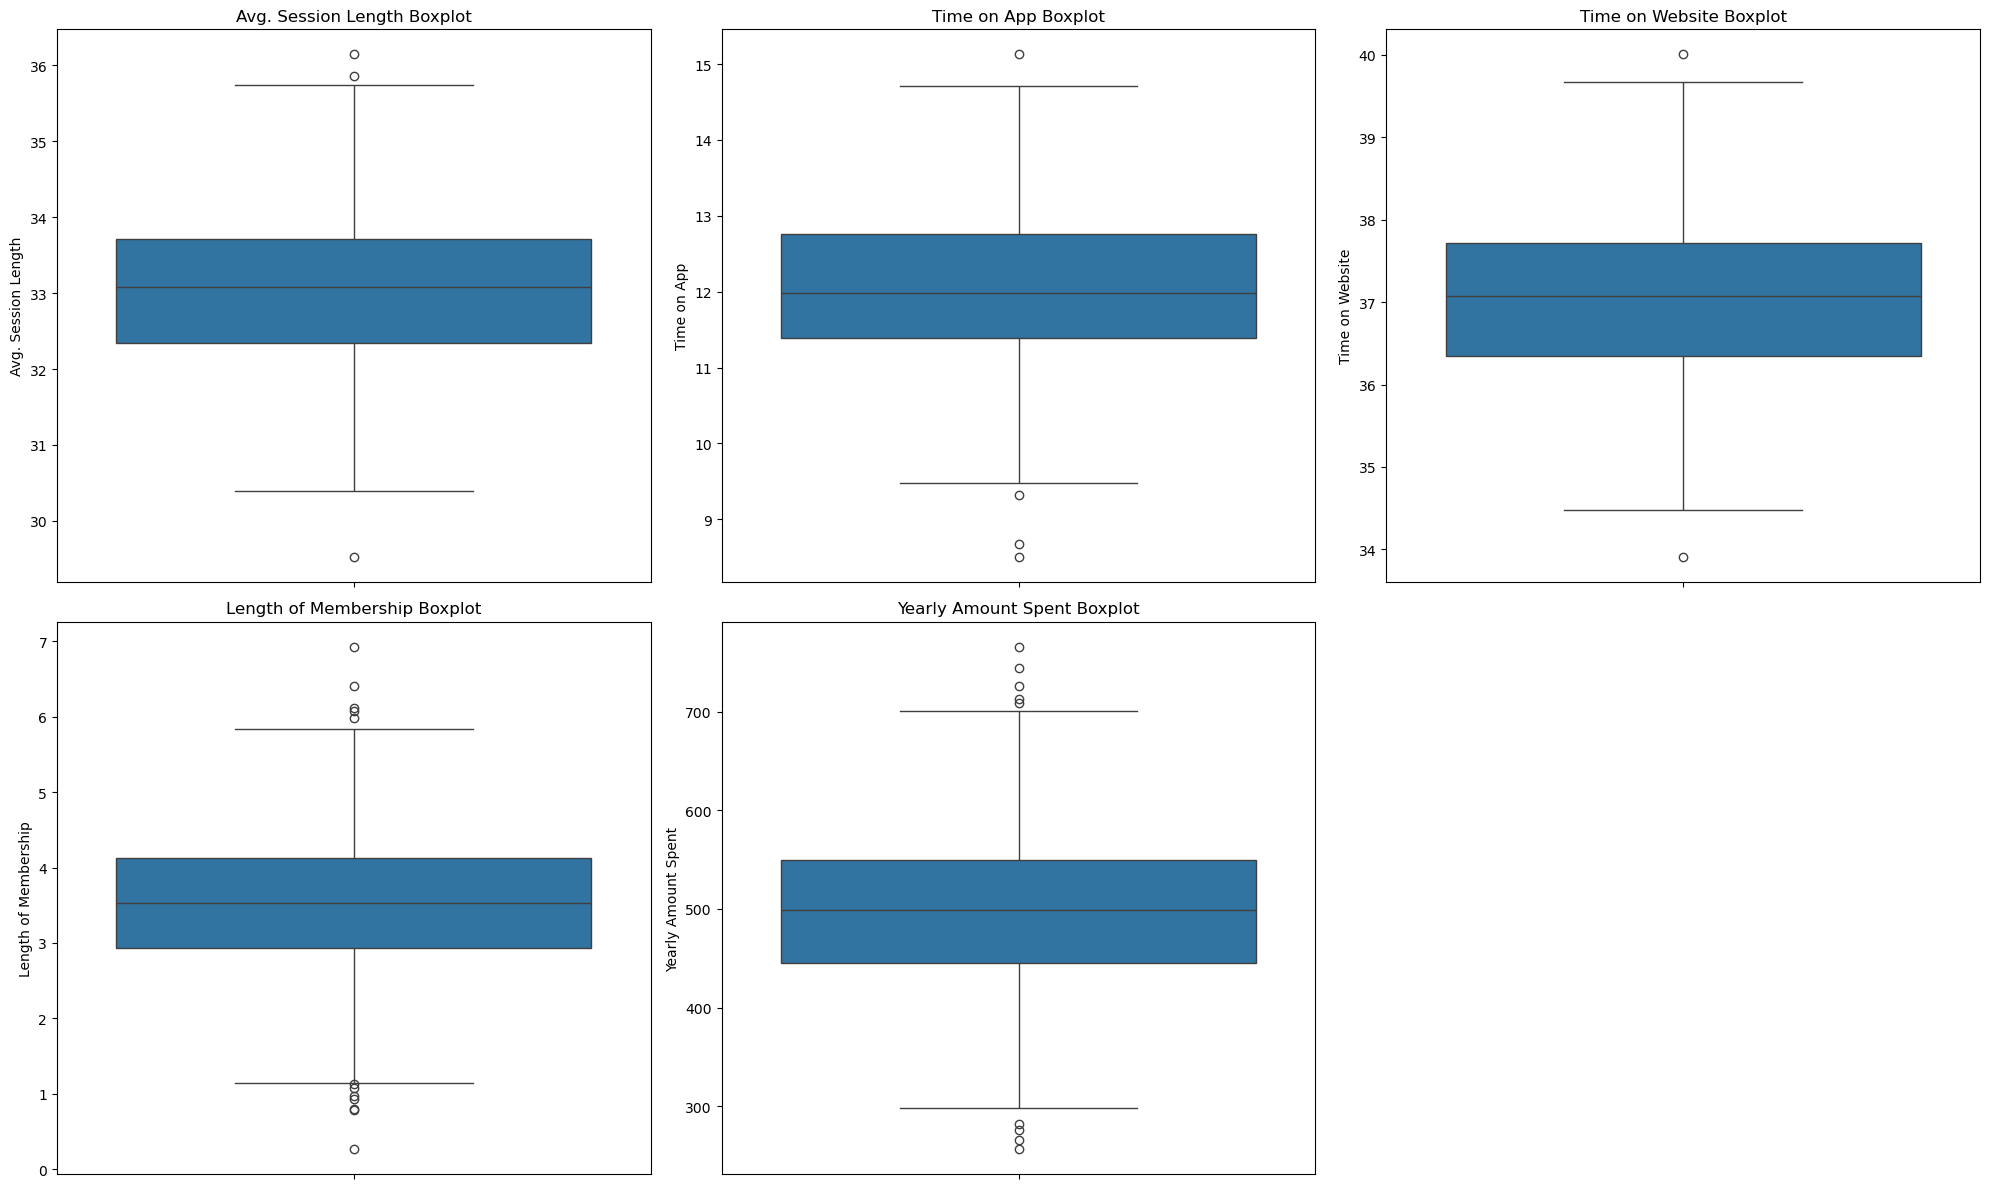

In [31]:
# Set up the matplotlib figure for boxplots
plt.figure(figsize=(20, 12))

# Boxplots to Detect Outliers
plt.subplot(2, 3, 1)
sns.boxplot(y=ecommerce_data['Avg. Session Length'])
plt.title('Avg. Session Length Boxplot')

plt.subplot(2, 3, 2)
sns.boxplot(y=ecommerce_data['Time on App'])
plt.title('Time on App Boxplot')

plt.subplot(2, 3, 3)
sns.boxplot(y=ecommerce_data['Time on Website'])
plt.title('Time on Website Boxplot')

plt.subplot(2, 3, 4)
sns.boxplot(y=ecommerce_data['Length of Membership'])
plt.title('Length of Membership Boxplot')

plt.subplot(2, 3, 5)
sns.boxplot(y=ecommerce_data['Yearly Amount Spent'])
plt.title('Yearly Amount Spent Boxplot')

plt.tight_layout()
plt.show()

**Scatter Plots**:
   - **Avg. Session Length vs Yearly Amount Spent**: Look for trends indicating if users who spend more time per session tend to spend more annually.
   - **Time on App vs Yearly Amount Spent**: Check if more time spent on the app correlates with higher yearly spending.
   - **Time on Website vs Yearly Amount Spent**: Examine if time spent on the website has a significant impact on yearly spending.
   - **Length of Membership vs Yearly Amount Spent**: Determine if longer membership durations are associated with higher annual spending.



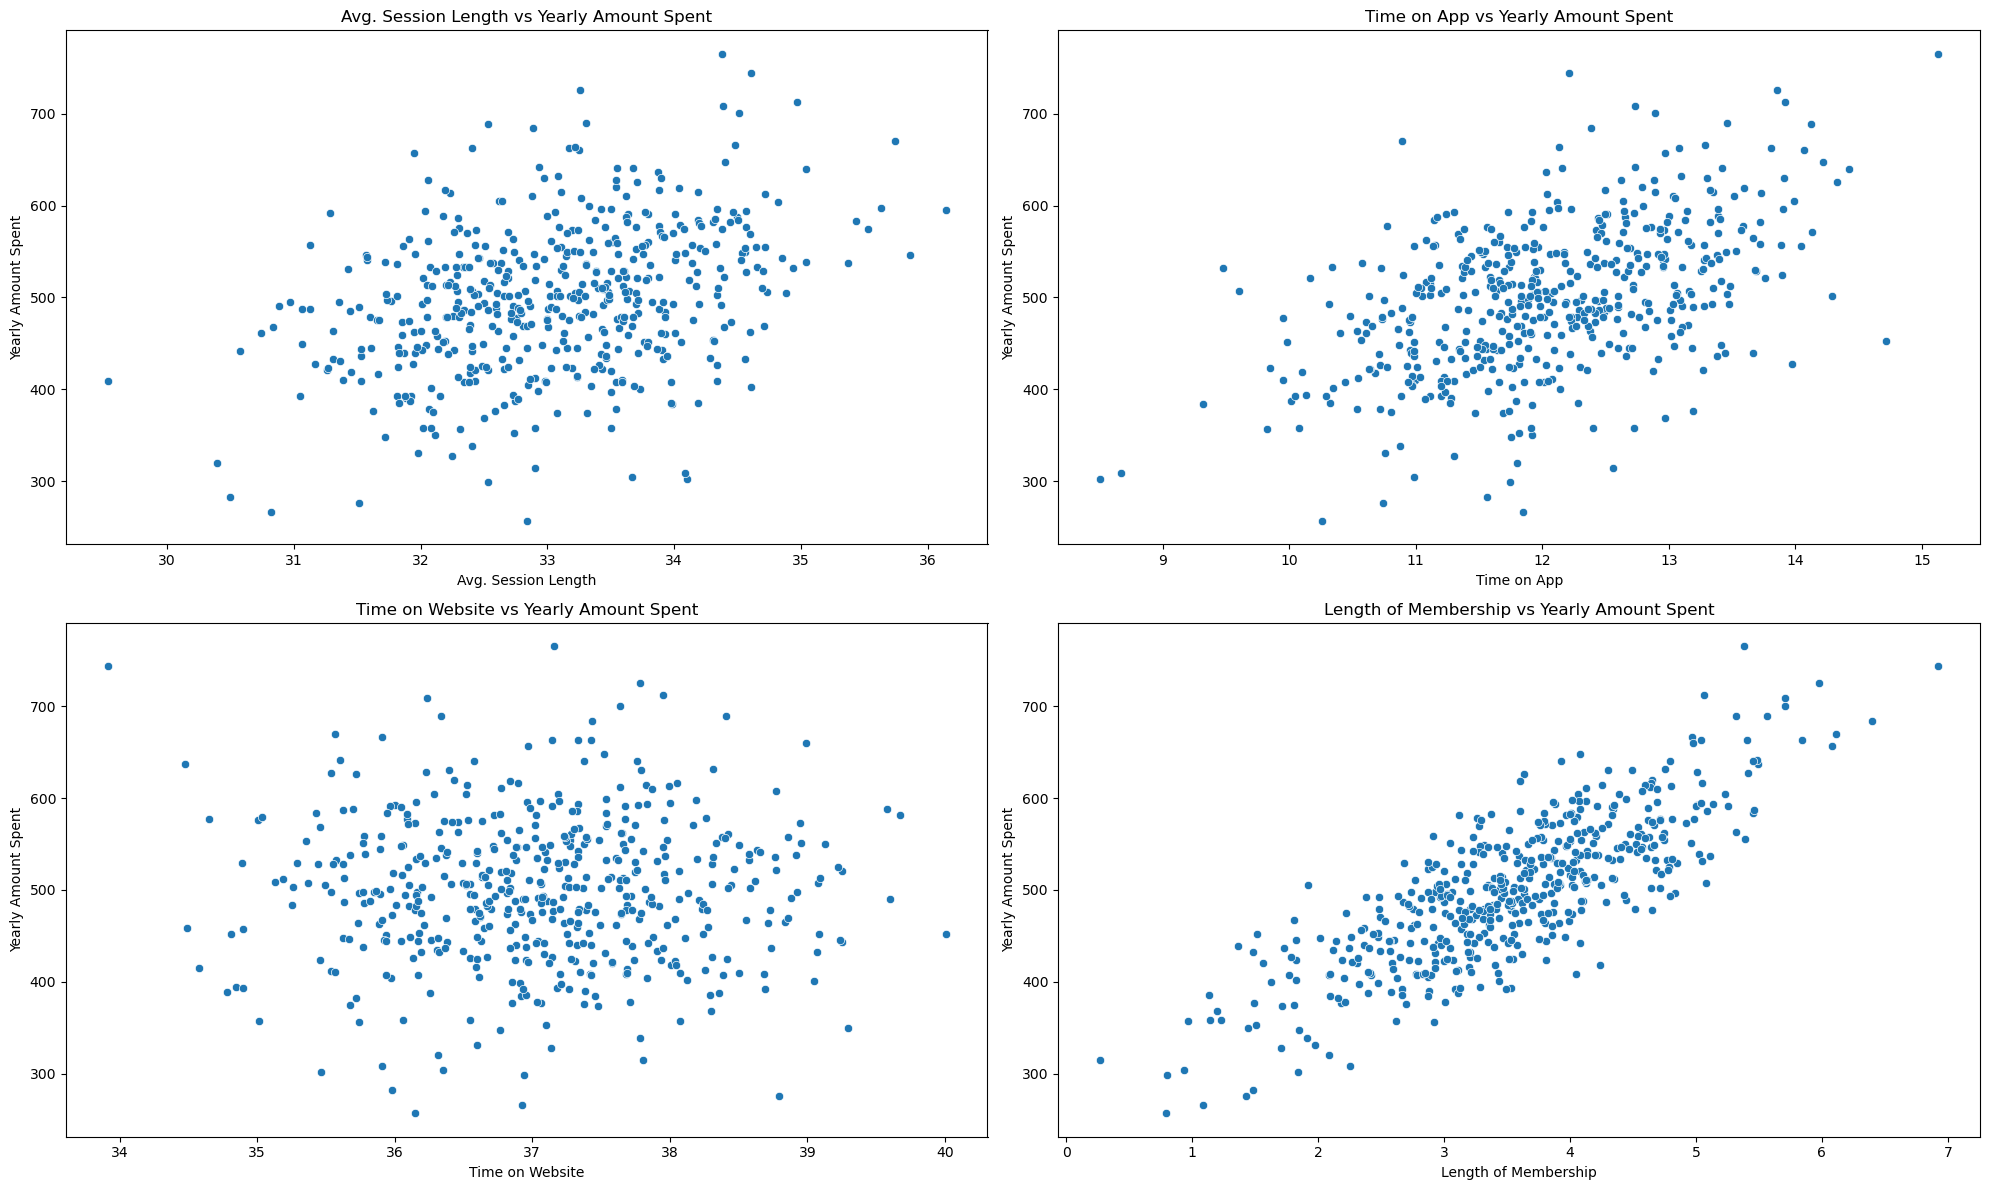

In [34]:
# Scatter plots to visualize relationships
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Avg. Session Length', y='Yearly Amount Spent', data=ecommerce_data)
plt.title('Avg. Session Length vs Yearly Amount Spent')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Time on App', y='Yearly Amount Spent', data=ecommerce_data)
plt.title('Time on App vs Yearly Amount Spent')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Time on Website', y='Yearly Amount Spent', data=ecommerce_data)
plt.title('Time on Website vs Yearly Amount Spent')

plt.subplot(2, 2, 4)
sns.scatterplot(x='Length of Membership', y='Yearly Amount Spent', data=ecommerce_data)
plt.title('Length of Membership vs Yearly Amount Spent')

plt.tight_layout()
plt.show()

In [36]:
# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [38]:
# Columns to check for outliers
columns_to_check = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

# Remove outliers
ecommerce_data_clean = remove_outliers(ecommerce_data, columns_to_check)

# Display the shape of the original and cleaned data
print("Original data shape:", ecommerce_data.shape)
print("Cleaned data shape:", ecommerce_data_clean.shape)


Original data shape: (500, 8)
Cleaned data shape: (474, 8)


### **Post-Outlier Removal Visualization**

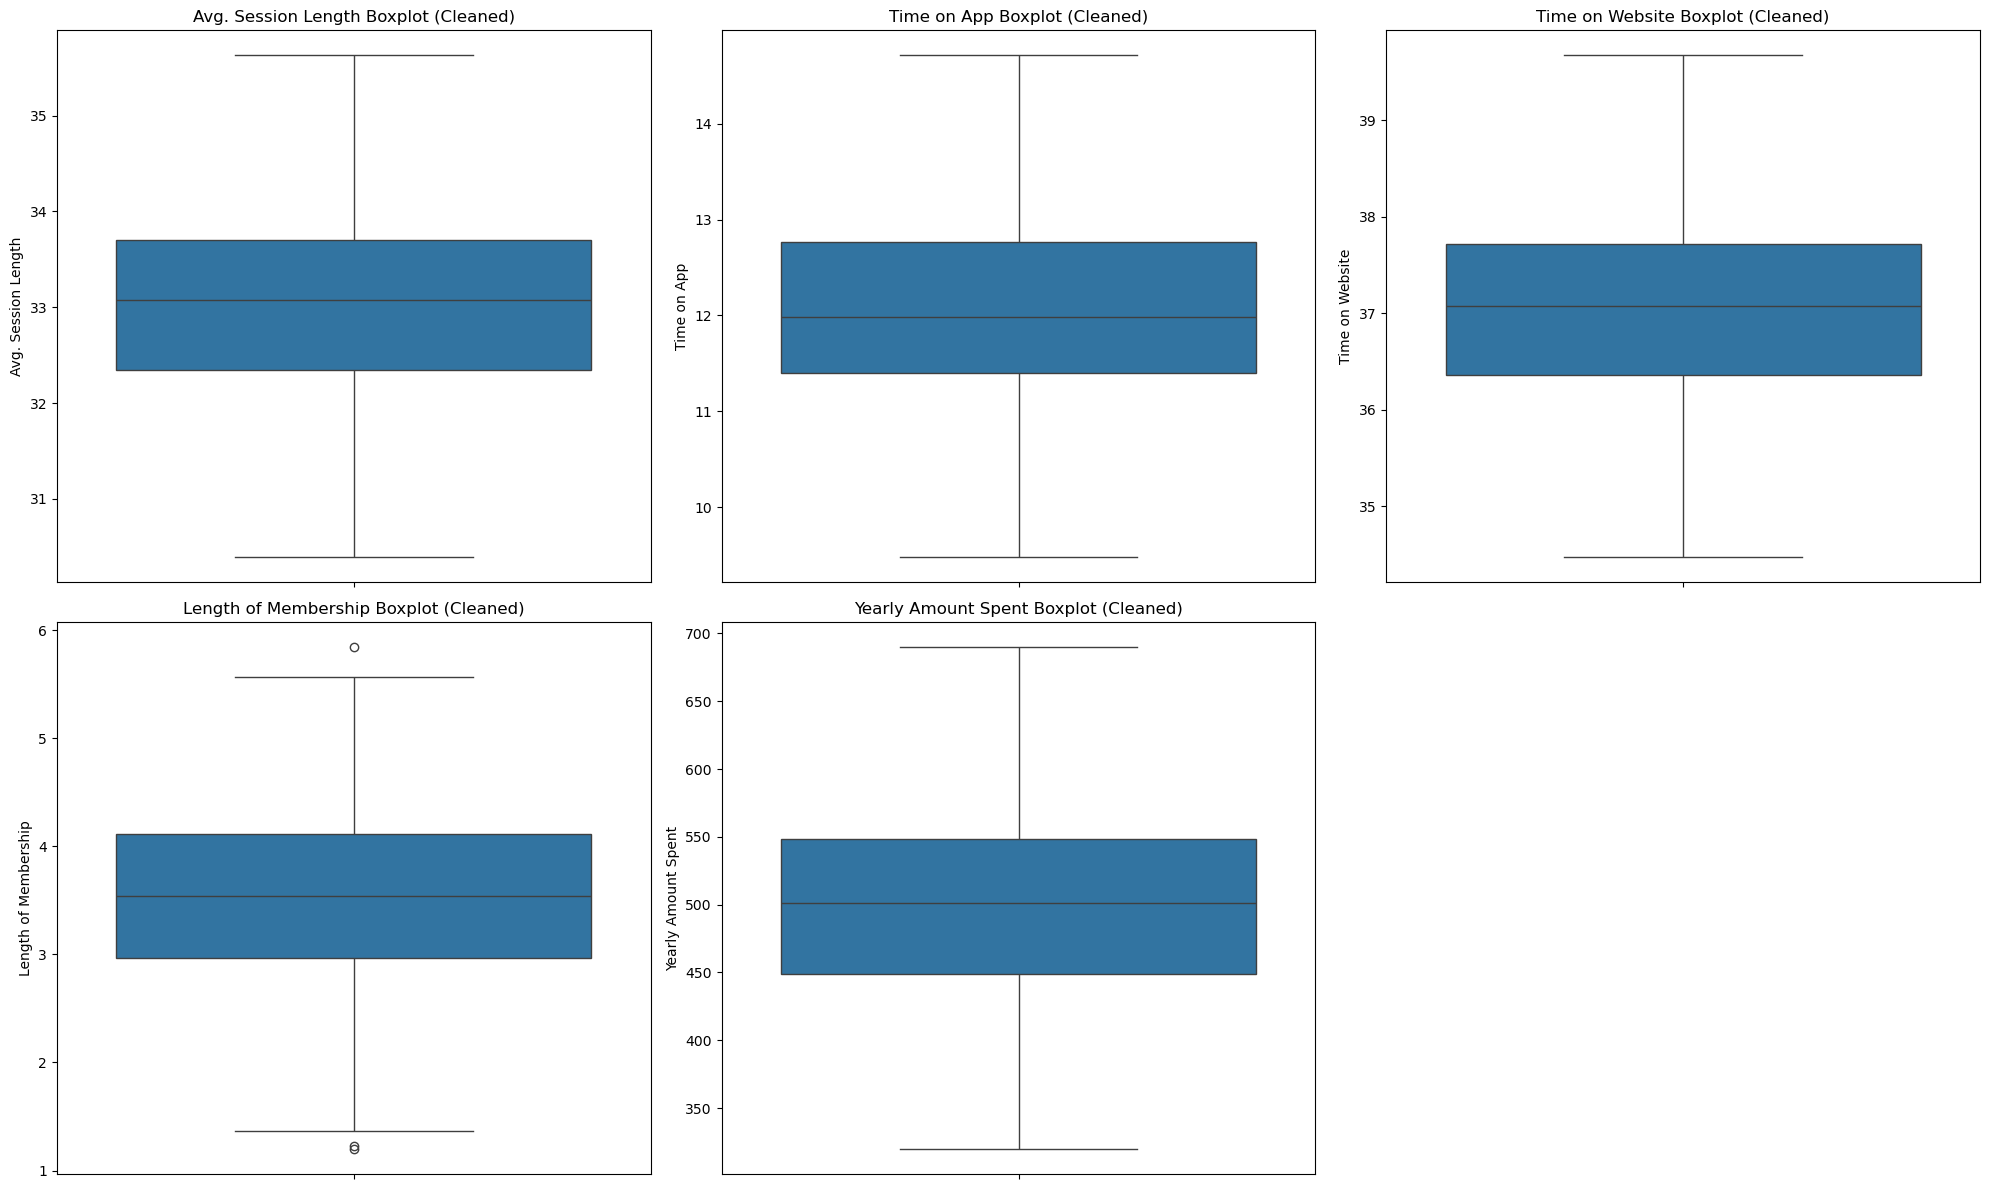

In [41]:
# Display boxplots of cleaned data
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
sns.boxplot(y=ecommerce_data_clean['Avg. Session Length'])
plt.title('Avg. Session Length Boxplot (Cleaned)')

plt.subplot(2, 3, 2)
sns.boxplot(y=ecommerce_data_clean['Time on App'])
plt.title('Time on App Boxplot (Cleaned)')

plt.subplot(2, 3, 3)
sns.boxplot(y=ecommerce_data_clean['Time on Website'])
plt.title('Time on Website Boxplot (Cleaned)')

plt.subplot(2, 3, 4)
sns.boxplot(y=ecommerce_data_clean['Length of Membership'])
plt.title('Length of Membership Boxplot (Cleaned)')

plt.subplot(2, 3, 5)
sns.boxplot(y=ecommerce_data_clean['Yearly Amount Spent'])
plt.title('Yearly Amount Spent Boxplot (Cleaned)')

plt.tight_layout()
plt.show()

### **Linear Regression Model**

In [46]:
# Load the dataset
ecommerce_data = pd.read_csv("Ecommerce_Customers.csv")

# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df



In [48]:
# Columns to check for outliers
columns_to_check = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']

# Remove outliers
ecommerce_data_clean = remove_outliers(ecommerce_data, columns_to_check)



In [50]:
# Features and target variable
X = ecommerce_data_clean[['Avg. Session Length','Time on Website','Time on App','Length of Membership']]
y = ecommerce_data_clean['Yearly Amount Spent']



In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [54]:
# Initialize and train the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

In [56]:
# Make predictions
y_pred = lm.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)



In [58]:

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)



Mean Absolute Error: 7.7594870187905665
Mean Squared Error: 90.2989316764088
Root Mean Squared Error: 9.50257500240902
R^2 Score: 0.9821574340439576


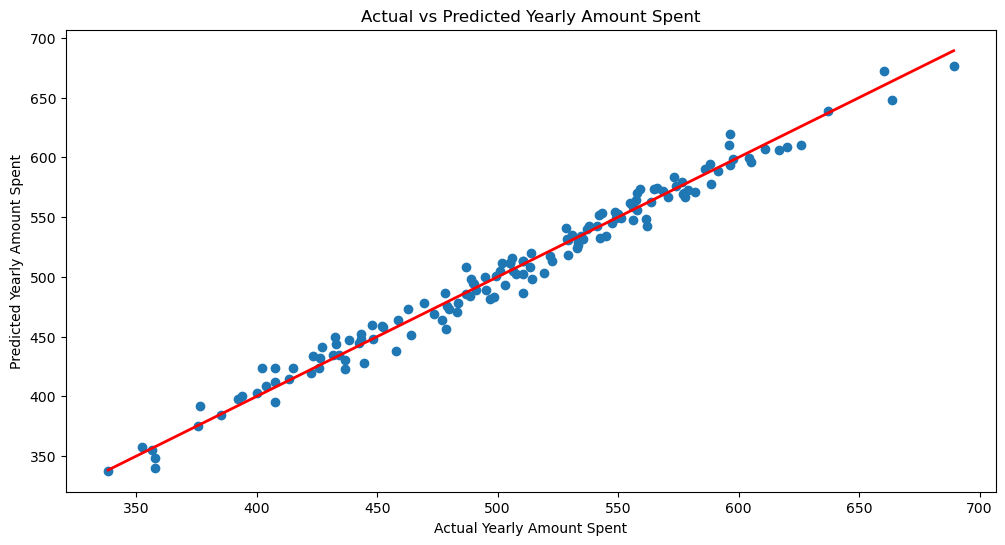

In [60]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs Predicted Yearly Amount Spent')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.show()


# Student task 

Train the data on a different model to see how well it works with the data.